使用鸢尾花数据集:每种鸢尾花有四个特征（萼片长度、萼片宽度、花瓣长度和花瓣宽度）


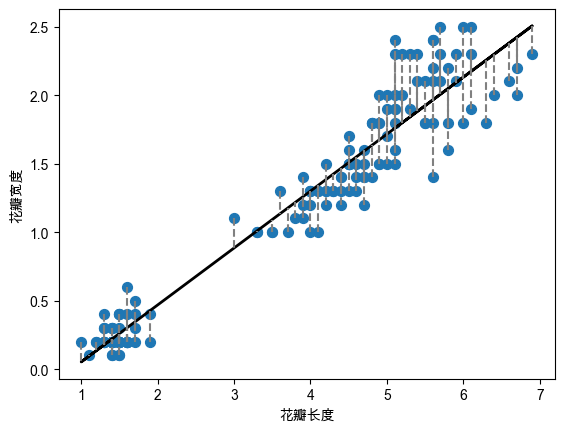

系数 [[0.41575542]]
截距 [-0.36307552]
对长度为8.0的花，预测其花宽度
当花瓣长度为8.0时，宽度的预测值为： [[2.96296781]]


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
import platform  
print("使用鸢尾花数据集:每种鸢尾花有四个特征（萼片长度、萼片宽度、花瓣长度和花瓣宽度）")

# 导入数据
iris = load_iris() 
 
# 数据预处理
data = pd.DataFrame(iris.data)
# 分别添加萼片长度、萼片宽度、花瓣长度和花瓣宽度为列名
data.columns = ['sepal-length','sepal-width','petal-length','petal-width']
# 花瓣长度为x轴，花瓣宽度为y轴
x = data['petal-length'].values
y = data['petal-width'].values
# 对数据进行归一化操作
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
 
# 导入要训练的线性回归模型
clf = LinearRegression()
# 用数据集的数据训练模型
clf.fit(x,y)
 
# 模型训练完毕后，根据模型和输入数据计算出花瓣宽度的预测值，待会要用这些值画出回归线
pre = clf.predict(x)
 
# 设置字体
if platform.system() == 'Windows':  
    plt.rcParams['font.sans-serif'] = ['SimHei']  #Windows默认支持的中文字体 
else:  
    plt.rcParams['font.sans-serif'] = ['Hiragino Sans GB']  # macOS默认支持的中文字体 
    
# 使用散点图表示真实值与预测值以及使用模型训练得到的一元曲线
#plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.scatter(x,y,s=50) #使用三点图来表示
plt.plot(x,pre,'k-',linewidth=2) #表示绘制一条黑色实线('k-')，线条的宽度为2个单位(linewidth=2)。其中，x对应于横坐标轴，pre对应于纵坐标轴。
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
for idx,m in enumerate(x):
    plt.plot([m,m], [y[idx],pre[idx]], color = "gray", linestyle="--")#使用plt.plot()函数绘制一条从点(m, y[idx])到点(m, pre[idx])的灰色虚线(“--”)，表示真实值与对应的预测值之间的连接线。
plt.show()
print(u'系数',clf.coef_)
print(u'截距',clf.intercept_)
 
print("对长度为8.0的花，预测其花宽度")
print("当花瓣长度为8.0时，宽度的预测值为：",clf.predict([[8.0]]))